# Logistic Regression Project

## Predicting Rainfall in Australia

### Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df= pd.read_csv("weatherAUS.csv") #taken from kaggle

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [10]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Exploratory data analysis

In [11]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
cf.go_offline()

NameError: name 'cf' is not defined

<AxesSubplot:xlabel='Location', ylabel='count'>

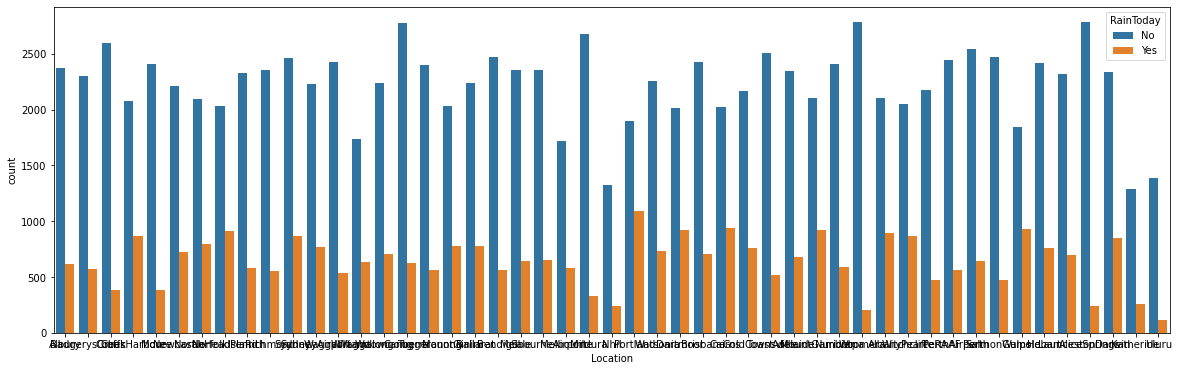

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x='Location',data=df,hue='RainToday')

<AxesSubplot:xlabel='Temp3pm', ylabel='count'>

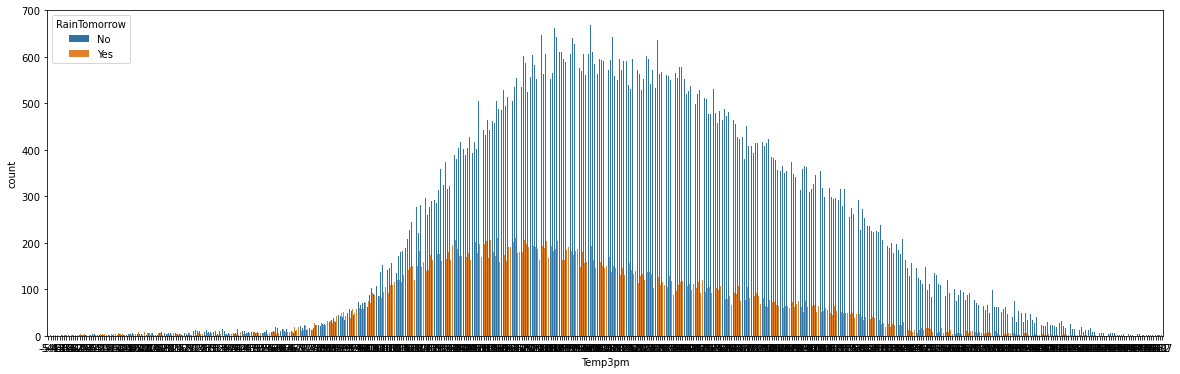

In [14]:
plt.figure(figsize=(20,6))
sns.countplot(x='Temp3pm',hue='RainTomorrow',data=df)

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

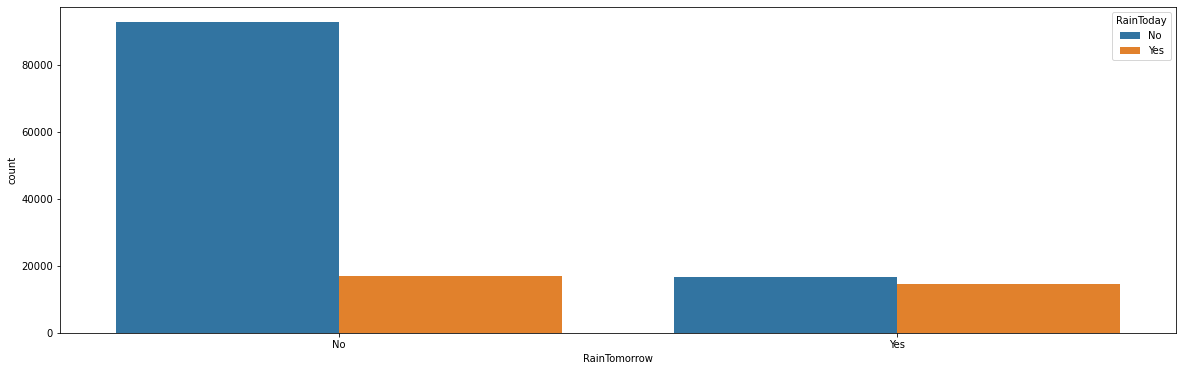

In [15]:
plt.figure(figsize=(20,6))
sns.countplot(x='RainTomorrow',hue='RainToday',data=df)

<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

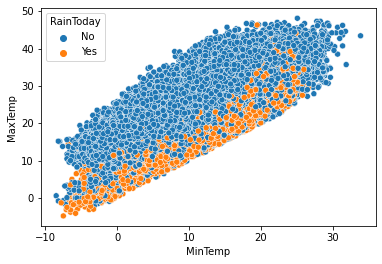

In [16]:
sns.scatterplot(x='MinTemp',y='MaxTemp',data=df,hue='RainToday')

<AxesSubplot:xlabel='MinTemp', ylabel='Humidity3pm'>

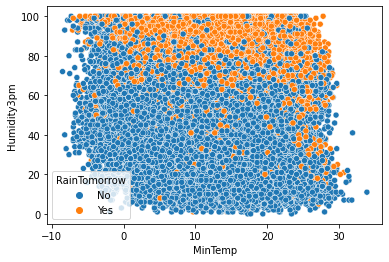

In [17]:
sns.scatterplot(x='MinTemp',y='Humidity3pm',data=df,hue='RainTomorrow')

### Cleaning data

In [18]:
df.head().transpose()

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


### Filling missisng data in numerical columns

In [17]:
#df.replace({'RainTomorrow':{'No':0,'Yes':1}},inplace=True)

In [18]:
#df.replace({'RainToday':{'No':0,'Yes':1}},inplace=True)

In [21]:
#df['RainTomorrow']=df['RainTomorrow'].astype(int)

In [22]:
#df['RainToday']=df['RainToday'].astype(int)

In [19]:
numeric_cols=df.select_dtypes(exclude='object').columns.tolist()

In [20]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [21]:
#cat_cols=df.select_dtypes(include='object').columns.tolist()

In [22]:
cat_cols=df[['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm']]

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imputer=SimpleImputer(strategy='mean')

In [25]:
imputer.fit(df[numeric_cols])

SimpleImputer()

In [26]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

In [27]:
imputer.transform(df[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [ 3.6       , 25.3       ,  0.        , ...,  4.49925023,
        10.9       , 24.5       ],
       [ 5.4       , 26.9       ,  0.        , ...,  4.49925023,
        12.5       , 26.1       ],
       [ 7.8       , 27.        ,  0.        , ...,  2.        ,
        15.1       , 26.        ]])

In [28]:
df[numeric_cols] = imputer.transform(df[numeric_cols])

In [29]:
df[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [30]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [31]:
#df['Date']= df['Date'].str.replace('-','')

In [32]:
df=df.drop('Date',1)

/var/folders/22/rnr_sc0s7ddcbt4klf6sc8d00000gn/T/ipykernel_3261/656067039.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [33]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.472516,7.63054,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,5.472516,7.63054,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,5.472516,7.63054,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,5.472516,7.63054,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,5.472516,7.63054,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


### Scaling data

In [34]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [35]:
X= df.drop('RainTomorrow',1)
y=df['RainTomorrow']

/var/folders/22/rnr_sc0s7ddcbt4klf6sc8d00000gn/T/ipykernel_3261/2364020690.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [36]:
scaler=MinMaxScaler()

In [37]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [38]:
df[numeric_cols]=scaler.transform(df[numeric_cols])

In [39]:
df[numeric_cols].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704


In [40]:
df['RainTomorrow'].value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

In [41]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073,No,No
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058,No,No
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944,No,No
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284,No,No
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,No,No


### Encoding categorical data

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
cat_cols

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145454,Uluru,E,ESE,E
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW


In [44]:

df= pd.get_dummies(df,columns=['Location','WindGustDir','WindDir9am','WindDir3pm'],drop_first=True)

In [45]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW'],
      dtype='object', length=111)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Columns: 111 entries, MinTemp to WindDir3pm_WSW
dtypes: float64(16), object(2), uint8(93)
memory usage: 32.9+ MB


In [47]:
#df['Date']= df['Date'].str.replace('-','')

In [48]:
df.replace({'RainTomorrow':{'No':0,'Yes':1}},inplace=True)

In [49]:
df.replace({'RainToday':{'No':0,'Yes':1}},inplace=True)

In [50]:
df['RainTomorrow']=df['RainTomorrow'].astype(int)

In [51]:
df['RainToday']=df['RainTomorrow'].astype(int)

### Training data

In [52]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,...,0,0,0,0,0,0,0,0,1,0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,...,0,0,0,0,0,0,0,0,0,1
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,...,0,0,0,0,0,0,0,0,0,1
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,...,0,0,0,0,0,0,0,0,0,0
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,...,0,1,0,0,0,0,0,0,0,0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X= df.drop(['RainTomorrow'],1)
y=df['RainTomorrow']

/var/folders/22/rnr_sc0s7ddcbt4klf6sc8d00000gn/T/ipykernel_3261/3792121858.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model= LogisticRegression()

In [58]:
model.fit(X_train,y_train)

LogisticRegression()

In [59]:
print(model.intercept_)

[-9.33174379]


In [60]:
predictions=model.predict(X_train)


In [61]:
predictions


array([0, 1, 0, ..., 1, 0, 0])

In [62]:
pred=model.predict(X_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test, pred)

1.0

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test, pred, normalize='true')

array([[1., 0.],
       [0., 1.]])

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21868
           1       1.00      1.00      1.00      6290

    accuracy                           1.00     28158
   macro avg       1.00      1.00      1.00     28158
weighted avg       1.00      1.00      1.00     28158



In [69]:
X_train.shape

(112629, 110)

In [70]:
X_test.shape

(28158, 110)

In [71]:
y_train.shape

(112629,)

In [72]:
y_test.shape

(28158,)